# aula = "Análise de Clusters"




## Como analisar clusters?

O Processo de segmentar e agrupar objetos faz parte de como o cerébro humano processa o mundo. Quando, por exemplo, queremos aprender uma nova matéria, faz parte do processo separar o conteúdo em partes, que podem ser sequênciais ou não.

Podemos pensar na forma como lidamos com música em nosso dia a dia. Podemos agrupar músicas por década de lançamento, artista, gênero, entre outros critérios. O importante é que ao agruparmos as músicas dessa maneira, se torna mais fácil lidar com a quantidade de músicas que existem e são lançadas anualmente. 

A Análise de Clusters é o processo de estruturar e expandir essa habilidade humana fazendo uso do Aprendizado de Máquina. Através de algoritmos e métodos estatísticos tornamos o processo de encontrar grupos escalável e reprodutível.

**Definição:** *"Encontrar grupos de objetos de tal forma que objetos em um grupo sejam similares (ou relacionados) um ao outro e diferentes de (ou não relacionados) a objetos em outros grupos." (Tan et al., 2006)*


Quando falamos do processo de encontrar clusters por meio de Clusterização é importante termos em mente que os clusters a serem encontrados dependem de uma série de fatores. A escolha de algoritmo, parâmetros e a forma de avaliação tem relação direta com o resultado desse processo.

**O que não é Clusterização:**
* Classificação Supervisionada
* Segmentação Simples
* Resultado de uma consulta SQL

## Etapas da análise de clusters
* Representação do Problema
* Selecionar Medida de Proximidade
* Selecionar Algoritmo
* Avaliar Grupos encontrados



## Representação e Preparação de Dados

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Neste momento nosso foco será na primeira dessas etapas. Iremos falar sobre a etapa de **Representação dos Dados**

### Representação de Problema

Em problemas Aprendizado de Máquina a definição do problema é uma fase de grande importância. Em nosso exemplo utilizaremos uma base de dados contendo informações sobre **364** pinguins. Nosso objetivo será determinar quantos grupos de pinguins existem. Embora aqui a gente esteja lidando com um problema aparentemente simples, ele pode ser expandido para cenários bem mais complexos, como segmentação de clientes ou de agências bancárias.

Em nosso caso, uma vez que sabemos que iremos aplicar técnicas de clustering em um banco de dados sobre pinguins, é hora de acessarmos os dados.

In [1]:
import pandas as pd

import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Aquisição de Dados

A fase de Preparação de dados é uma das que mais consome tempo em um projeto de ciência de dados. O mesmo acontece para problemas de clustering. 

In [2]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Data Tidy - Dados Tidy
Dados Tidy definem uma forma padrão de conectar a **estrutura** de uma base de dados, seu formato físico, com sua **semântica**, ou seja, seu significado.

* **Estrutura**: Os dados são definidos em forma de tabela, contendo linhas e colunas
* **Semântica**: O significado das informações que o banco de dados contém. Quando se fala nessa estrutura os dados podem ser organizados considerando duas visões: Variáveis e Observações.

#### As 3 Regras Tidy
1. Cada Variável é uma coluna
2. Cada Observação é uma linha
3. Cada tabela contém um tipo de dado.

In [3]:
data.tail()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


### Missing

Algo importante a se analisar é se os dados a que temos acesso possuem dados faltantes. Isso porque, em geral, os algoritmos que usamos em Aprendizado de Máquina não são capazes de lidar com esse tipo de dado. Além disso, Variáveis com muitos dados faltantes podem inserir algum tipo de ruído em nosso modelo.

In [4]:
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
temp = data.isna().sum()/(len(data))*100
temp

especie         0.000000
ilha            0.000000
comp_bico_mm    0.581395
larg_bico_mm    0.581395
comp_asa_mm     0.581395
peso_gr         0.581395
sexo            2.906977
dtype: float64

Existem várias formas de lidar com esse tipo de situação, nesse caso, podemos inputar valores, por exemplo, média ou moda...

In [6]:
# Moda
print(data['sexo'].mode())
data['sexo'].fillna(data['sexo'].mode()[0])

0    MALE
Name: sexo, dtype: object


0        MALE
1      FEMALE
2      FEMALE
3        MALE
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sexo, Length: 344, dtype: object

In [7]:
# Media
print(data['comp_asa_mm'].mean())

200.91520467836258


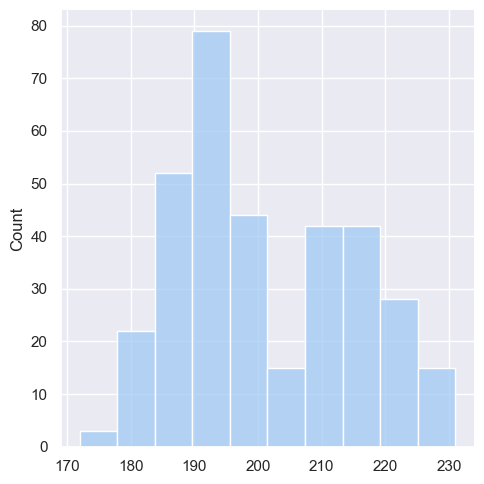

In [8]:
sns.displot(data.comp_asa_mm.values);

In [9]:
# nesse caso iremos apenas apagar as linhas que possuem valores faltantes
data = data.dropna()

### Outliers

São valores que destoam do restante dos dados. Por exemplo, em uma base de dados com idade de clientes, alguém com uma idade de 300 anos é um outlier, nesse caso, provavelmente  o valor é resultado de um erro de digitação, mas nem sempre somos capazes de determinar de forma tão direta o porque dos outliers que encontramos em nossos dados.

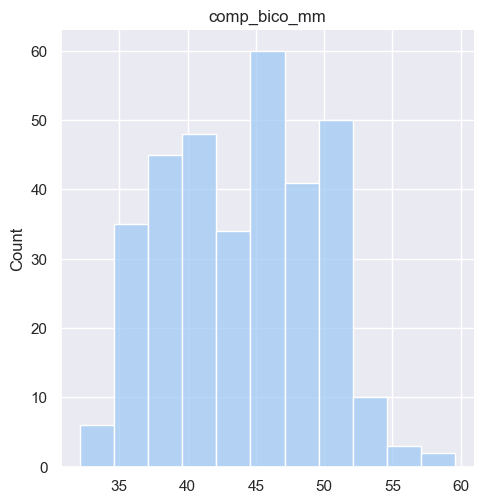

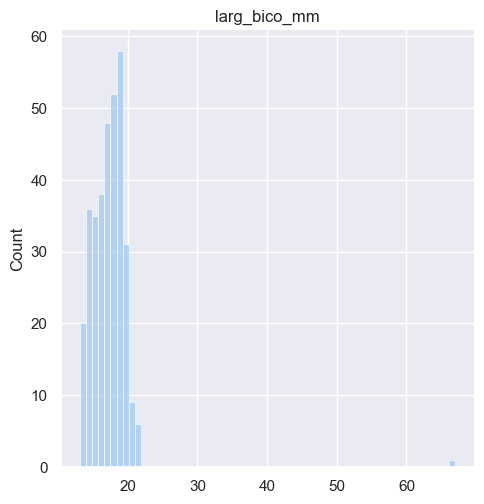

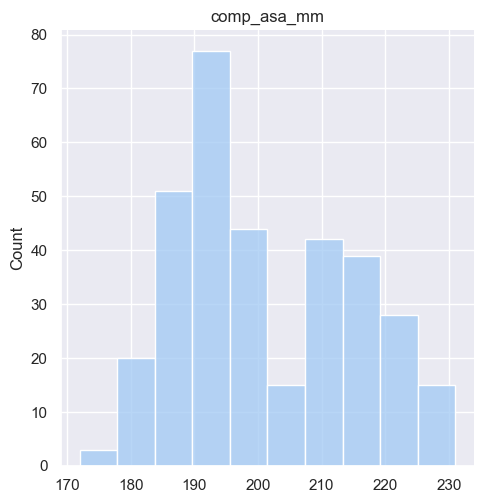

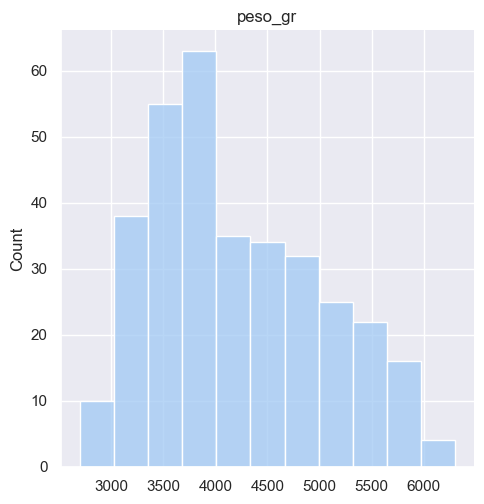

In [10]:
cols = ['comp_bico_mm', 'larg_bico_mm', 'comp_asa_mm', 'peso_gr']
for c in cols:
    sns.displot(data[c].values)\
        .set(title=c)

In [11]:
data[data.larg_bico_mm > 50]

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
37,Adelie,Dream,42.2,67.0,180.0,3550.0,FEMALE


In [12]:
data = data[data.larg_bico_mm < 50]

### Normalização

Algoritmos de Aprendizado de Máquina em geral necessitam de dados numéricos para funcionar. Isso porque em geral fazem uso de funções matemáticas e estatísticas que dependem de entradas numéricas para funcionar corretamente.

Além da necessidade de trabalhar com valores numéricos, quando falamos de algoritmos de **Agrupamento** é necessário também garantir que eles valores tenham escalas parecidas. 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
X, y = data.dropna().iloc[:, 2:-1], data.dropna().iloc[:, 0]

In [15]:
X

,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [16]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_.max()

1.0

In [17]:
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

## Medidas de Proximidade

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Clustering é sobre agrupar objetos parecidos ou similares. O quanto um objeto é similar a outro depende da distância entre eles. A forma de definir e calcular essa distância é bastante subjetiva e depende do tipo de item que estamos analisando. Sendo assim, é importante termos algum domínio sobre o tipo de dados com o qual estamos lidando.

Para definir a similaride entre objetos os algoritmos de clusterização utilizam distâncias. Algumas das mais comuns são:

* **Distância Euclidiana**: Tende a ser a métrica mais utilizada em projetos de Clustering. Ela pode ser definida como a distância em linha reta para dois pontos.

* **Distância Manhattam**: Calcula a distância absoluta entre dois pontos. Esse tipo de distância deve ser utilizado conforme a quantidade de variáveis contidas em nossa base de dados aumentam.

* **Distância Hamming**: É uma forma de calcular distâncias entre variáveis categóricas. Dada duas sequências de itens, o que a fórmula dessa distância faz é encontrar a quantidade de vezes em que os itens na mesma posição de cada uma das sequências são diferentes.

* **Similaridade por Cosseno**: Calcula a similaridade entre dois vetores em um espaço vetorial. Para isso é calculado o cosseno do ângulo formado entre os dois vetores. Normalmente essa métrica é utilizada em mineração de texto, por exemplo, para identificação de tópicos.


## Algoritmos de Agrupamento

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

In [18]:
from sklearn.cluster import KMeans

In [19]:
x = X_[:, [0,2]]

In [21]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(x)
labels = kmeans.labels_

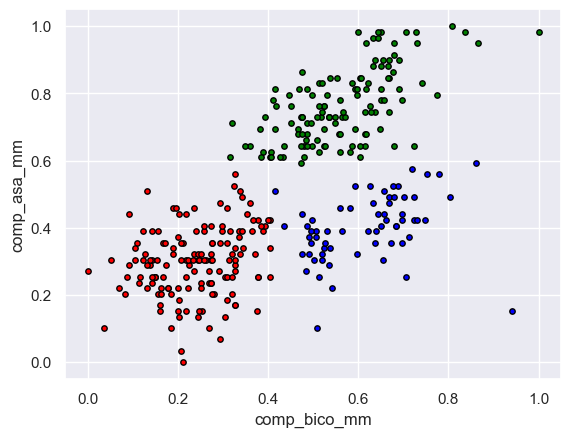

In [23]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

### Algoritmos de Densidade

In [24]:
from sklearn.cluster import DBSCAN

In [27]:
db = DBSCAN(eps=0.07, min_samples=10).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 26


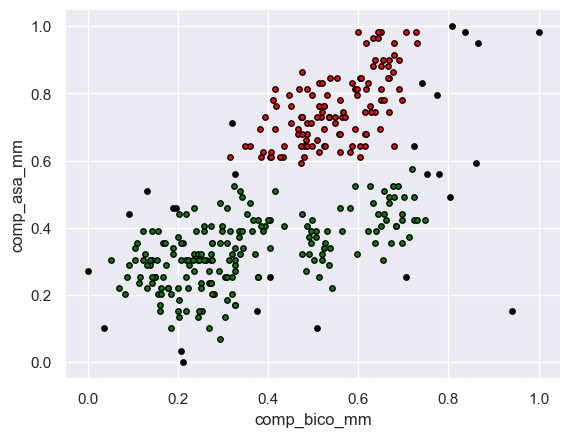

In [28]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="green", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == -1, 0], x[labels == -1, 1], color="black", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

# Hierarquical

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_)

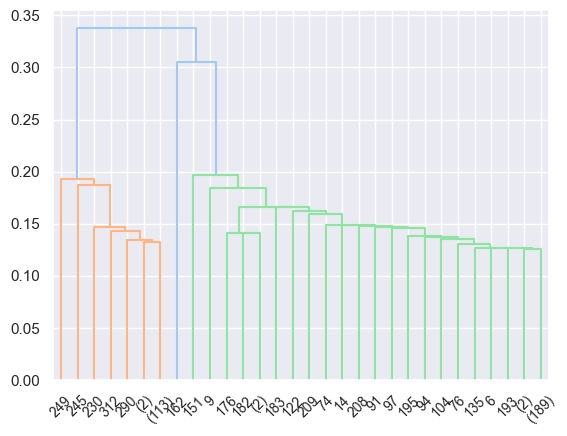

In [30]:
dendrogram(Z, truncate_mode='lastp');  

## Avaliação de Grupos

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Nosso foco será na última etapa: **Avaliar os Grupos Encontrados**.

*"A Validação das estruturas de grupos encontrados é a parte mais difícil e frustrante da Análise de Clusters. Sem um esforço consciente nessa direção, a Análise de Clusters continuara a ser uma Arte das Trevas, acessível apenas aos escolhidos, que possuem experiência e grande coragem." (Jain e Dubes, Algorithms for Clustering Data, 1988)*

Existem diferentes procedimentos para avaliar de maneira **objetiva** e **quantitativa** os resultados de análise de clustering.
Cada um desses procedimentos pode nos ajudar a responder uma ou mais questões do tipo:
* Encontramos grupos de fato?
* Grupos são pouco usuais ou facilmente encontrados ao acaso?
* Qual a qualidade (relativa ou absoluta) dos grupos encontrados?
* Qual é o número natural / mais apropriado de grupos?

A maneira **quantitativa** para validação é alcançada através de algum tipo de índice. 
Há 3 tipos de índices/critérios de validade:
* **Internos**: Avaliam o grau de compatibilidade entre a estrutura de grupos sob avaliação e os dados, usando apenas os próprios dados.
* **Relativos**: Avaliam qual dentre duas ou mais estruturas de grupos é melhor sob algum aspecto. Tipicamente são critérios internos capazes de quantificar a qualidade relativa.
* **Externos**: Avaliam o grau de correspondência entre a estrutura de grupos (partição ou hierarquia) sob avaliação e informação a priori na forma de uma solução de agrupamento esperada ou conhecida.


In [32]:
from sklearn import metrics

In [33]:
metrics.silhouette_score(x,kmeans.labels_)

0.5202564405821186

In [34]:
metrics.silhouette_score(x,db.labels_)

0.42385445622120743

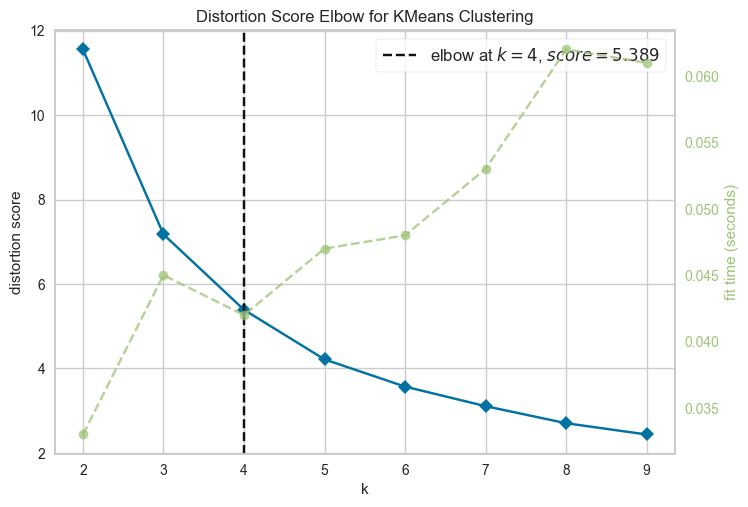

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True)
visualizer.fit(x) 
visualizer.show(); 


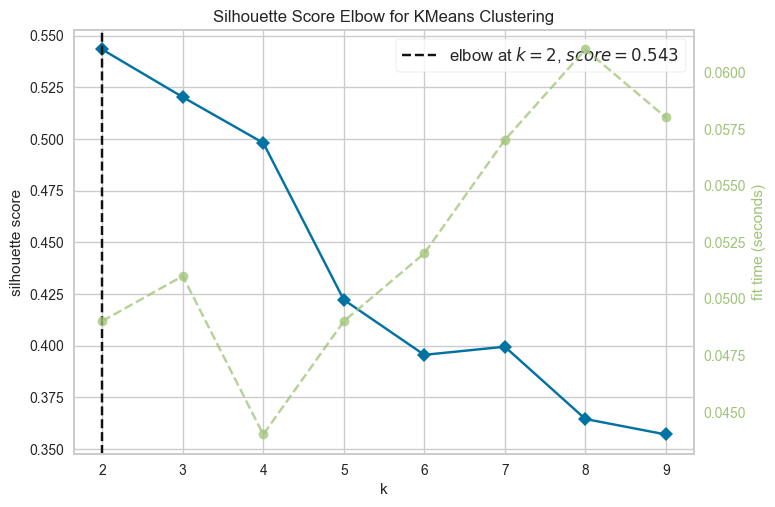

In [37]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(x) 
visualizer.show(); 


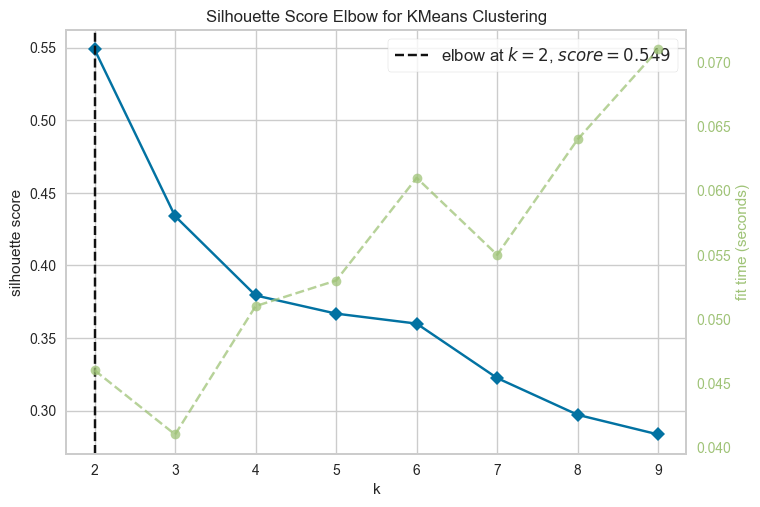

In [40]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X_) 
visualizer.show(); 